In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn
from collections import OrderedDict
import matplotlib.ticker as plticker
import scipy
from scipy import stats

In [2]:
scipy.version.version

'1.9.3'

In [3]:
df_ini = pd.read_excel('USV_summarized.xlsx')
df_ini.head()

,ID,group,time_interval,number_of_episodes,total_duration,mean_episode_duration,mean_frequency
0,KT,CTRL,0-1,25,0.87,0.035000,64.558
1,KT,CTRL,1-2,0,0.00,0.000000,0.000
2,KT,CTRL,2-3,0,0.00,0.000000,0.000
3,KT,CTRL,first_3_minutes,25,0.87,0.011667,64.558
4,KT,CTRL,total,25,0.87,0.035000,64.558


In [4]:
# create a table with 0-1, 1-2 and 2-3 time intervals only (first 3 minutes)

df_selected = df_ini[(df_ini["time_interval"] == "0-1") | (df_ini["time_interval"] == "1-2") | (df_ini["time_interval"] == "2-3")]
df_selected['Index'] = range(1, len(df_selected) + 1) 

df_selected_mean_episode_duration = df_selected[['Index', 'ID', 'group', 'mean_episode_duration']]
df_selected_mean_episode_duration = pd.pivot_table(df_selected_mean_episode_duration, 
               index=['Index', 'ID'], 
               columns=['group'], 
               values=['mean_episode_duration'])
df_selected_mean_episode_duration = df_selected_mean_episode_duration.reset_index()
df_selected_mean_episode_duration = df_selected_mean_episode_duration.fillna(0)
df_selected_mean_episode_duration.mean_episode_duration[["CTRL", "EXP"]].describe()
df_selected_mean_episode_duration.head()

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_3495/2859662110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Index'] = range(1, len(df_selected) + 1)


Index  ID mean_episode_duration       
group                            CTRL    EXP
0         1  KT                 0.035  0.000
1         2  KT                 0.000  0.000
2         3  KT                 0.000  0.000
3         4  KT                 0.000  0.017
4         5  KT                 0.000  0.000

In [5]:
scipy.stats.mannwhitneyu(df_selected_mean_episode_duration.mean_episode_duration.CTRL, df_selected_mean_episode_duration.mean_episode_duration.EXP)

MannwhitneyuResult(statistic=546.5, pvalue=0.042192116417599845)

In [6]:
df_selected_mean_frequency = df_selected[['Index', 'ID', 'time_interval', 'group', 'mean_frequency']]
df_selected_mean_frequency = pd.pivot_table(df_selected_mean_frequency, 
               index=['Index', 'ID', 'time_interval'], 
               columns=['group'], 
               values=['mean_frequency'])
df_selected_mean_frequency = df_selected_mean_frequency.replace(0, np.nan)
df_selected_mean_frequency = df_selected_mean_frequency.reset_index()
df_selected_mean_frequency.head()

Index  ID time_interval mean_frequency        
group                                   CTRL     EXP
0         1  KT           0-1         64.558     NaN
1         2  KT           1-2            NaN     NaN
2         3  KT           2-3            NaN     NaN
3         4  KT           0-1            NaN  57.427
4         5  KT           1-2            NaN     NaN

In [7]:
scipy.stats.mannwhitneyu(df_selected_mean_frequency.mean_frequency.CTRL, df_selected_mean_frequency.mean_frequency.EXP, nan_policy='omit')

MannwhitneyuResult(statistic=8.0, pvalue=0.3727272727272727)

In [8]:
df_selected_total_duration = df_selected[['Index', 'ID', 'group', 'total_duration']]
df_selected_total_duration = pd.pivot_table(df_selected_total_duration, 
               index=['Index', 'ID'], 
               columns=['group'], 
               values=['total_duration'])
df_selected_total_duration = df_selected_total_duration.reset_index()
df_selected_total_duration = df_selected_total_duration.fillna(0)
df_selected_total_duration.head()

Index  ID total_duration       
group                     CTRL    EXP
0         1  KT           0.87  0.000
1         2  KT           0.00  0.000
2         3  KT           0.00  0.000
3         4  KT           0.00  0.017
4         5  KT           0.00  0.000

In [9]:
scipy.stats.mannwhitneyu(df_selected_total_duration.total_duration.CTRL, df_selected_total_duration.total_duration.EXP)

MannwhitneyuResult(statistic=541.5, pvalue=0.054135364340956546)

In [10]:
df_selected_number_of_episodes = df_selected[['Index', 'ID', 'group', 'number_of_episodes']]
df_selected_number_of_episodes = pd.pivot_table(df_selected_number_of_episodes, 
               index=['Index', 'ID'], 
               columns=['group'], 
               values=['number_of_episodes'])
df_selected_number_of_episodes = df_selected_number_of_episodes.reset_index()
df_selected_number_of_episodes = df_selected_number_of_episodes.fillna(0)
df_selected_number_of_episodes.head()

Index  ID number_of_episodes     
group                         CTRL  EXP
0         1  KT               25.0  0.0
1         2  KT                0.0  0.0
2         3  KT                0.0  0.0
3         4  KT                0.0  1.0
4         5  KT                0.0  0.0

In [11]:
scipy.stats.mannwhitneyu(df_selected_number_of_episodes.number_of_episodes.CTRL, df_selected_number_of_episodes.number_of_episodes.EXP)

MannwhitneyuResult(statistic=538.0, pvalue=0.06406357017650396)

In [12]:
# create a table that will be used for the plot

df_mean_episode_duration = df_ini[['group', 'time_interval', 'mean_episode_duration']]
df_mean_episode_duration = df_mean_episode_duration[(df_mean_episode_duration['time_interval'] == '0-1') | (df_mean_episode_duration['time_interval'] == '1-2') | (df_mean_episode_duration['time_interval'] == '2-3')]
df_mean_episode_duration = pd.melt(df_mean_episode_duration, id_vars= ['group', 'time_interval'], value_vars=['mean_episode_duration'])
df_mean_episode_duration.value = df_mean_episode_duration.value *1000 # convert to ms
df_mean_episode_duration

,group,time_interval,variable,value
0,CTRL,0-1,mean_episode_duration,35.0
1,CTRL,1-2,mean_episode_duration,0.0
2,CTRL,2-3,mean_episode_duration,0.0
3,EXP,0-1,mean_episode_duration,17.0
4,EXP,1-2,mean_episode_duration,0.0
5,EXP,2-3,mean_episode_duration,0.0
6,CTRL,0-1,mean_episode_duration,33.0
7,CTRL,1-2,mean_episode_duration,44.0
8,CTRL,2-3,mean_episode_duration,34.0
9,EXP,0-1,mean_episode_duration,0.0


In [13]:
df_mean_episode_duration.groupby(['group']).mean() 

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_3495/2349238555.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_episode_duration.groupby(['group']).mean()


,value
group,
CTRL,41.200000
EXP,5.866667


In [14]:
sem = df_mean_episode_duration.groupby(['group']).sem()   
print(sem)
sem = sem.reindex(['EXP', 'CTRL'], level='group')
sem = sem.values
sem

           value
group           
CTRL   20.726840
EXP     3.347873


/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_3495/2538545603.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem = df_mean_episode_duration.groupby(['group']).sem()


array([[ 3.34787305],
       [20.7268402 ]])

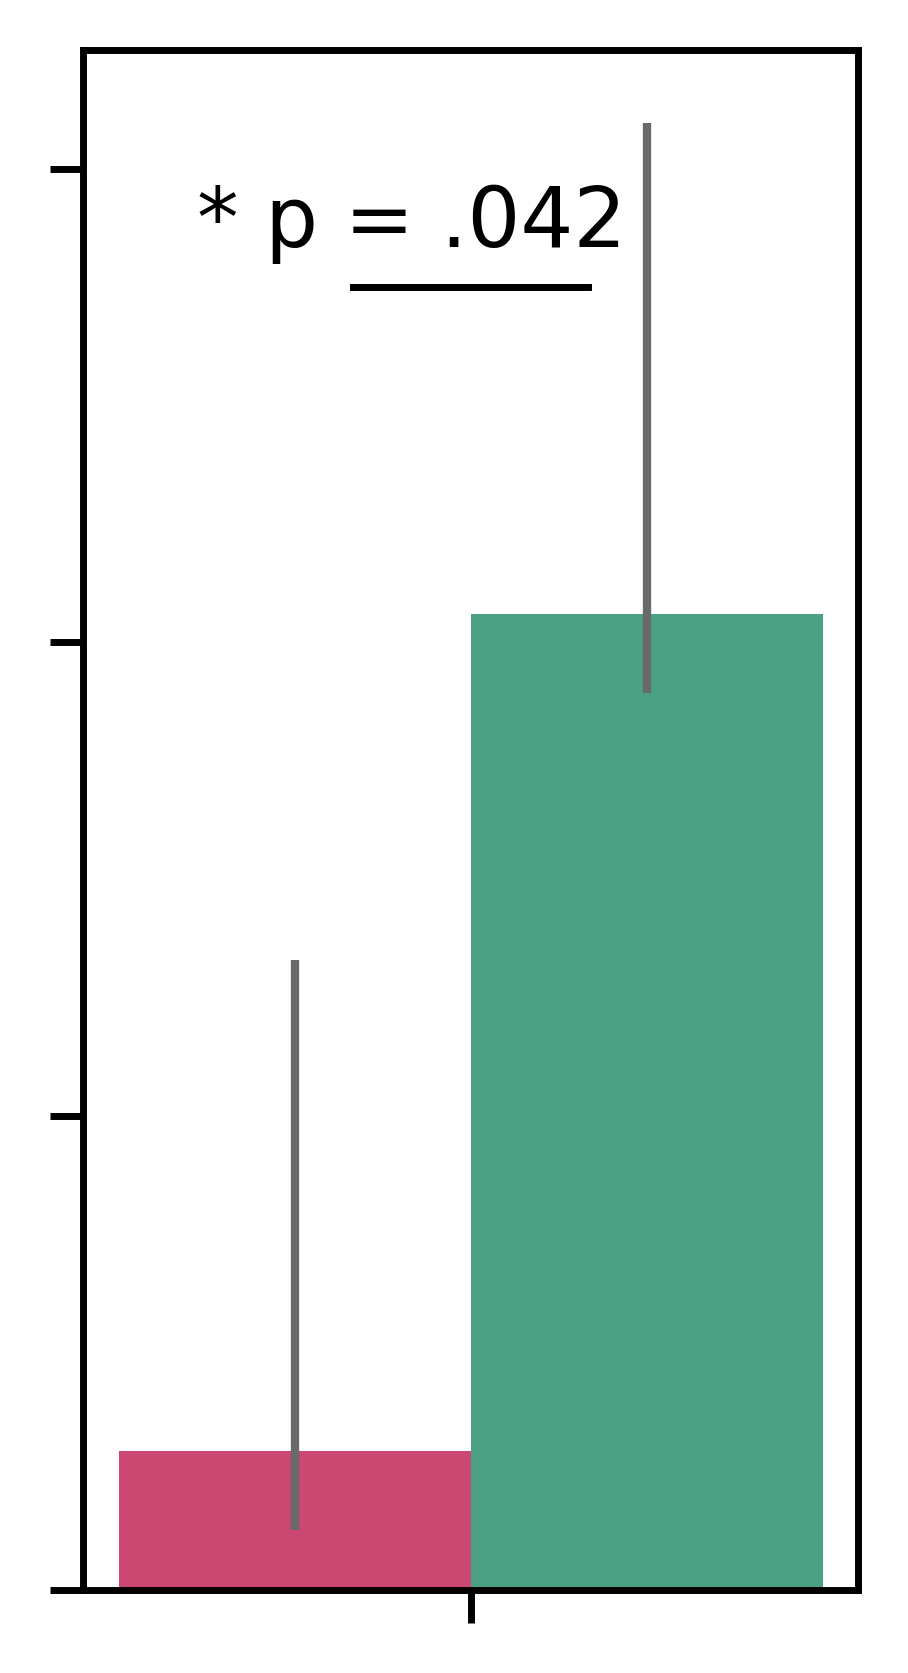

In [15]:
plt.figure(figsize=(2, 4), dpi=500)
seaborn.set_context('paper')
pal_1 = seaborn.color_palette(['#E0326A', '#3BAF87'])

ax = seaborn.barplot(x="variable", y="value", hue="group", hue_order=['EXP', 'CTRL'],
                     data=df_mean_episode_duration, errorbar = None,
                     palette=pal_1, width = 0.6, linewidth = 0.8)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem, fmt=' ', ecolor='dimgray')

plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks = [0], labels= [""], fontsize = 13)
#plt.legend(loc = 'upper left', fontsize = 13)
plt.yticks(ticks = [0, 20, 40, 60, 80], labels= ['', '', '', '', ''], fontsize=13)
ax.get_legend().remove()

plt.plot([-0.1,-0.1,0.1,0.1], [55,55,55,55], linewidth=1, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text(-0.05, 55+1, "* p = .042", ha = 'center', va='bottom', color='k', fontsize=12)

plt.savefig('wykresy/mean_episode_duration_0_3_barplot.tiff')
plt.show()

In [16]:
# create a table that will be used for the plot

df_mean_frequency = df_ini[['group', 'time_interval', 'mean_frequency']]
df_mean_frequency = df_mean_frequency[(df_mean_frequency['time_interval'] == '0-1') | (df_mean_frequency['time_interval'] == '1-2') | (df_mean_frequency['time_interval'] == '2-3')]
df_mean_frequency = pd.melt(df_mean_frequency, id_vars= ['group', 'time_interval'], value_vars=['mean_frequency'])
df_mean_frequency = df_mean_frequency.replace(0, np.nan)
df_mean_frequency

,group,time_interval,variable,value
0,CTRL,0-1,mean_frequency,64.558
1,CTRL,1-2,mean_frequency,NaN
2,CTRL,2-3,mean_frequency,NaN
3,EXP,0-1,mean_frequency,57.427
4,EXP,1-2,mean_frequency,NaN
5,EXP,2-3,mean_frequency,NaN
6,CTRL,0-1,mean_frequency,56.218
7,CTRL,1-2,mean_frequency,54.855
8,CTRL,2-3,mean_frequency,55.312
9,EXP,0-1,mean_frequency,NaN


In [17]:
df_mean_frequency.groupby(['group']).mean()  

/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_3495/398010462.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_frequency.groupby(['group']).mean()


,value
group,
CTRL,57.050
EXP,60.799


In [18]:
sem = df_mean_frequency.groupby(['group']).sem()   
print(sem)
sem = sem.reindex(['EXP', 'CTRL'], level='group')
sem = sem.values
sem

          value
group          
CTRL   2.922875
EXP    2.824501


/var/folders/_x/ry9s55s15p7fz95r041pw6fc0000gp/T/ipykernel_3495/3708029456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem = df_mean_frequency.groupby(['group']).sem()


array([[2.82450072],
       [2.92287456]])

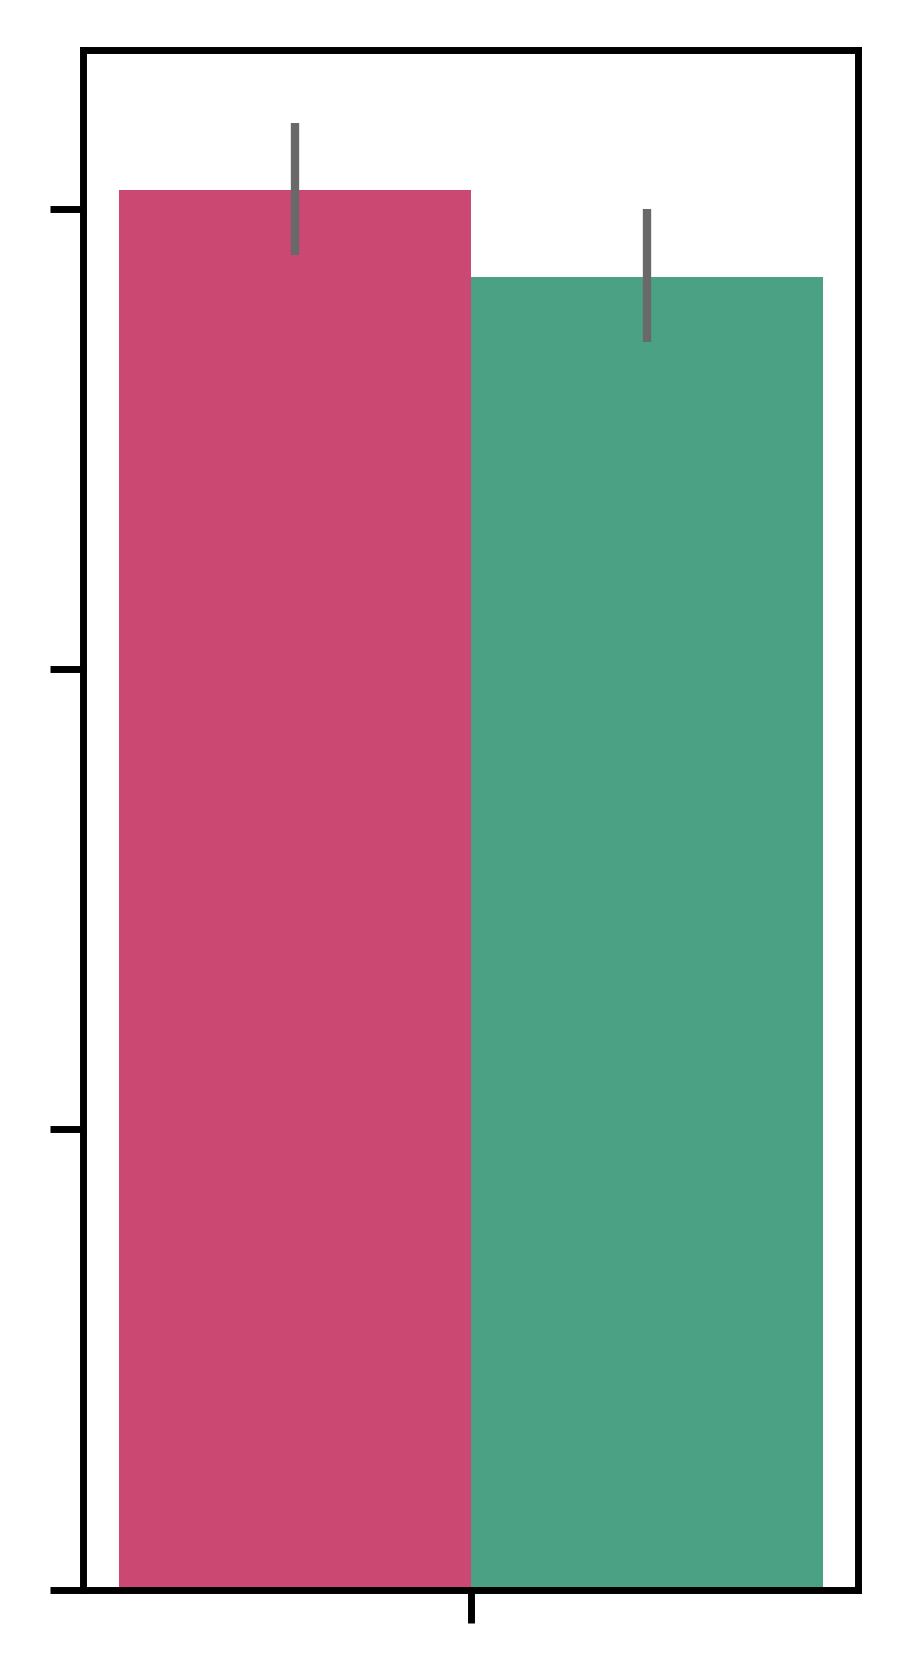

In [19]:
plt.figure(figsize=(2, 4), dpi=500)
seaborn.set_context('paper')
pal_1 = seaborn.color_palette(['#E0326A', '#3BAF87'])

ax = seaborn.barplot(x="variable", y="value", hue="group", hue_order=['EXP', 'CTRL'],
                     data=df_mean_frequency, errorbar = None,
                     palette=pal_1, width = 0.6, linewidth = 0.8)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem, fmt=' ', ecolor='dimgray')

plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks = [0], labels= [""], fontsize=13)
#plt.legend(loc = 'lower left', fontsize = 13)
plt.yticks(ticks = [0, 20, 40, 60], labels= ['', '', '', ''], fontsize=13)
ax.get_legend().remove()

#plt.plot([-0.1,-0.1,0.1,0.1], [0.05,0.05,0.05,0.05], linewidth=1, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
#plt.text((-0.1+0.1)*.5, 0.05+0.001, "p = .056", ha='center', va='bottom', color='k', fontsize=12)

plt.savefig('wykresy/mean_frequency_0_3_barplot.tiff')
plt.show()